# Online Store: prioritize hypotheses and launch an A/B test
## Goal:
The goal of this project is to evaluate and prioritize hypotheses aimed at increasing online store revenue, as well as analyze the results of the A/B test.
## The following tasks will be solved within the framework of the project:

 - Prioritize hypotheses using the ICE and RICE methods and compare the results.
 - Analyze the results of the A/B test, including revenue metrics, average order size and conversion rates, and identify statistically significant differences between the test groups.
 - Make a decision on the further course of testing and offer recommendations based on the analysis.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
hypotheses = pd.read_csv ('/datasets/hypotheses_us.csv', sep=';')
pd.options.display.max_colwidth = 100
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average...,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products ...,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


In [3]:
hypotheses['ICE'] = hypotheses['Impact'] * hypotheses['Confidence'] / hypotheses['Effort']
hypotheses['ICE'] = hypotheses['ICE'].round(2)
hypotheses = hypotheses.sort_values(by='ICE', ascending=False)
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort,ICE
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.20
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.33
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.20
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.00
2,Add product recommendation blocks to the store's site. This will increase conversion and average...,8,3,7,3,7.00
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.00
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.33
3,Change the category structure. This will increase conversion since users will find the products ...,8,3,3,8,1.12
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.00


In [4]:
hypotheses['RICE'] = hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence'] / hypotheses['Effort']
hypotheses = hypotheses.sort_values(by='RICE', ascending=False)
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.20,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average...,8,3,7,3,7.00,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.33,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.00,40.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.20,16.2
3,Change the category structure. This will increase conversion since users will find the products ...,8,3,3,8,1.12,9.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.00,4.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.33,4.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.00,3.0


* Conclusion:

When comparing the priority of hypotheses in ICE and RICE, you will notice that some hypotheses are prioritized higher and others are downgraded when using RICE. The main difference between ICE and RICE is the addition of the Reach parameter to the RICE formula.

Here is how the changes affect the priority of hypotheses:

Hypothesis 7 (Add a subscription form to all the main pages): This hypothesis is promoted to the first position in RICE due to its high Reach value (10). It has high reach, influence, and confidence with moderate effort, which makes it a higher priority in RICE.

Hypothesis 2 (Add product recommendation blocks): This hypothesis was ranked lower in ICE, but it is promoted in RICE due to its relatively high reach (8). Reach increases its RICE value, pushing it up to the second position.

Hypothesis 0 (Add two new channels for attracting traffic): Although this hypothesis had a high ICE score due to Impact and Confidence, its RICE rank is slightly lower because it has a lower Reach (3) compared to the others.

Hypothesis 8 (Launch a promotion that gives users discounts): Despite having high Impact and Confidence scores, this hypothesis is downgraded because it has a low Reach (1). This shows that while the hypothesis promises a high Impact, it will reach a smaller audience.

Explanation of the changes
The RICE formula (Reach × Impact × Confidence / Effort) takes into account the potential reach of each hypothesis, i.e. how many users will be affected. When the Reach value is low, RICE downgrades the hypothesis even if it has high Impact and Confidence, because the effect will be limited to a smaller number of users.

In [5]:
orders = pd.read_csv('/datasets/orders_us.csv')
orders['date']=orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d')) 
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [6]:
visitors = pd.read_csv('/datasets/visits_us.csv')
visitors['date']=visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


## Check for duplicates and missing values

In [7]:
hypotheses.duplicated().sum()

0

In [8]:
hypotheses.isnull().sum()

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Effort        0
ICE           0
RICE          0
dtype: int64

In [9]:
orders.duplicated().sum()

0

In [10]:
orders.isnull().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [11]:
visitors.duplicated().sum()

0

In [12]:
visitors.isnull().sum()

date      0
group     0
visits    0
dtype: int64

Checking the data for obvious duplicates and missing values ​​did not reveal any errors. All data was filled in correctly, and no obvious duplicates were found in the table rows.

## Checking user intersections in A/B test groups 

In [13]:
# Creating lists of users by groups
group_a_users = set(orders[orders['group'] == 'A']['visitorId'])
group_b_users = set(orders[orders['group'] == 'B']['visitorId'])

# Finding intersections
intersecting_users = group_a_users.intersection(group_b_users)

print(f"Number of users in both groups: {len(intersecting_users)}")

Number of users in both groups: 58


In [14]:
# Excluding users in both groups
orders = orders[~orders['visitorId'].isin(intersecting_users)]

In the orders table, 58 users were found to be in both A/B test groups.
These users were excluded from the analysis before calculating cumulative metrics.

## Stability of Cumulative Metrics

In [15]:
datesGroups = orders[['date','group']].drop_duplicates()
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
    'date' : 'max', 
    'group' : 'max', 
    'transactionId' : pd.Series.nunique, 
    'visitorId' : pd.Series.nunique, 
    'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
    'date' : 'max', 
    'group' : 'max', 
    'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visits']

cumulativeData.head(5)


,date,group,orders,buyers,revenue,visits
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845


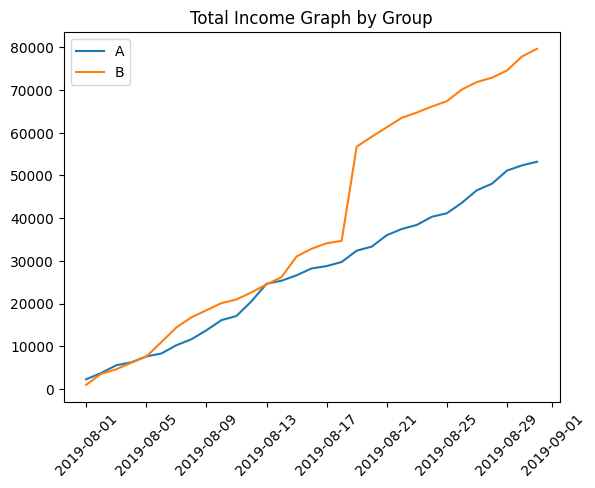

In [16]:
# DataFrame with cumulative orders and cumulative revenue by day, group A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# DataFrame with cumulative orders and cumulative revenue by day, group B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Plotting the group A revenue graph 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Plotting the group B revenue graph 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('Total Income Graph by Group')
plt.legend()
plt.xticks(rotation=45)
plt.show()

Revenue increases steadily throughout the test. However, we see a spike in revenue at a certain point in Group B. This could indicate either a spike in the number of orders or the presence of very expensive orders in the sample.

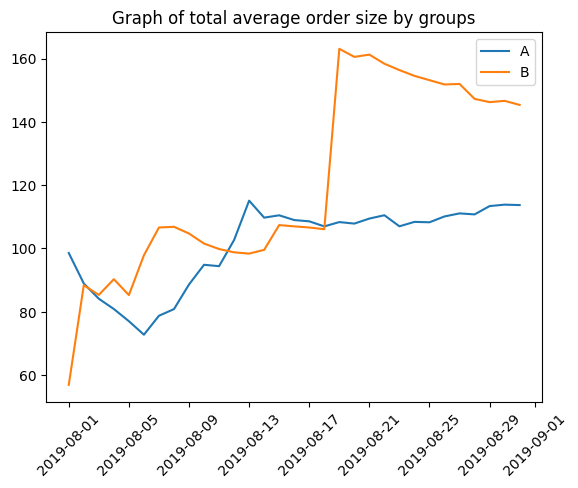

In [17]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Graph of total average order size by groups')
plt.legend()
plt.xticks(rotation=45)
plt.show()

The average purchase size also stabilizes towards the end of the test: it stabilizes for Group A and continues to fall for Group B.

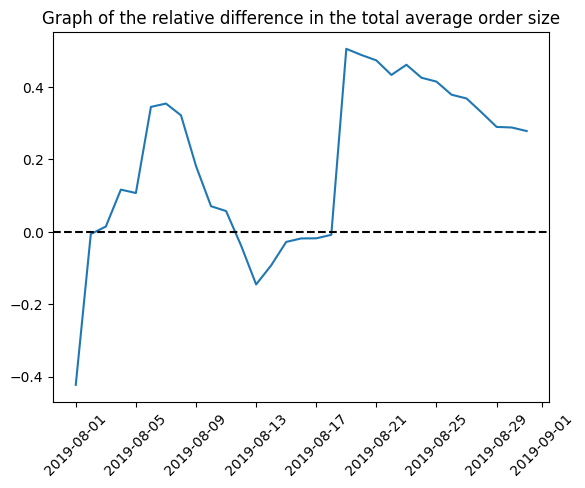

In [18]:
# gathering the data into one DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# plotting a relative difference graph for the average purchase sizes
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# adding the X axis
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Graph of the relative difference in the total average order size')
plt.xticks(rotation=45)
plt.show()

At several points the difference between the segments increases sharply, which means there must be some large orders and outliers.

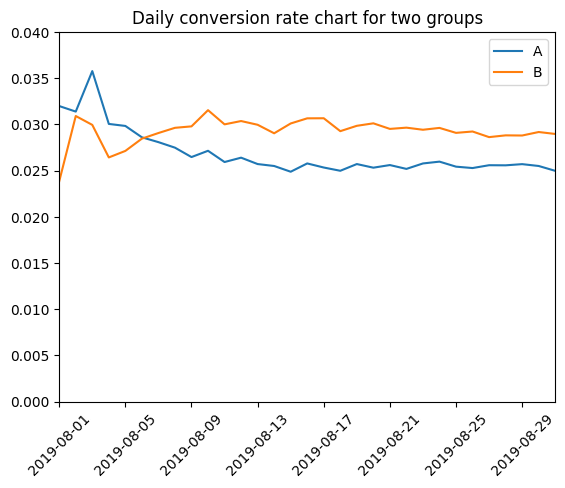

In [19]:
# calculating cumulative conversion
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visits']

# selecting data on group A 
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# selecting data on group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# plotting the graphs
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# setting the axes' scale
plt.axis([pd.Timestamp("2019-08-01"), pd.Timestamp("2019-08-31"), 0, 0.04])
plt.title('Daily conversion rate chart for two groups')
plt.xticks(rotation=45)
plt.show()

There are minor differences in conversion rates between Groups A and B. Overall, Group B performs slightly better than Group A.

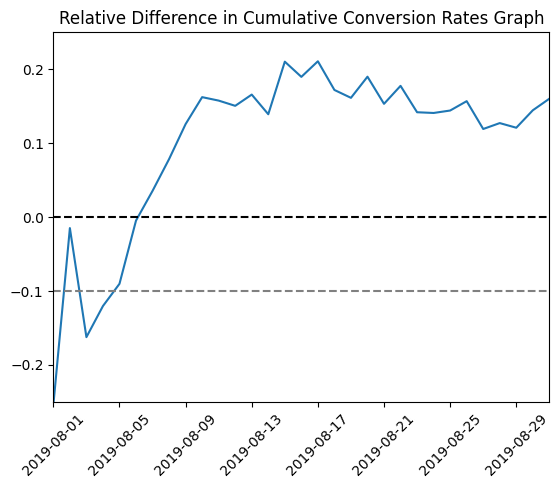

In [20]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis([pd.Timestamp("2019-08-01"), pd.Timestamp("2019-08-31"), -0.25, 0.25])
plt.title('Relative Difference in Cumulative Conversion Rates Graph')
plt.xticks(rotation=45)
plt.show()

In some periods, one group showed higher conversion rates (values ​​above the zero line), and in other periods, the other group did better (values below the zero line). This suggests that the leadership in conversion rates was shifting from one group to another.

## Analyzing Outliers and Surges

In [21]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsers.columns = ['userId', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,userId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


Text(0.5, 1.0, 'Scatter chart of the number of orders per user')

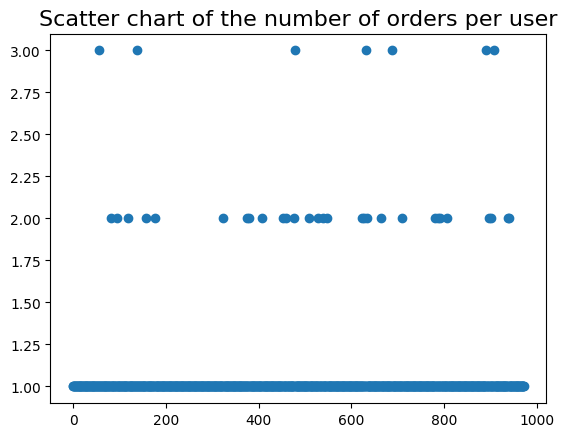

In [22]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Scatter chart of the number of orders per user', fontsize=16)

The graph shows that there are indeed many users with two or three orders.

In [23]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

5% of users made more than 1 order. Let's label these users as abnormal.

In [24]:
orders.sort_values(by='revenue', ascending=False).head(10)

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,19920.4,B
1196,3936777065,2108080724,2019-08-15,3120.1,B
1136,666610489,1307669133,2019-08-13,1425.8,A
744,3668308183,888512513,2019-08-27,1335.6,B
743,3603576309,4133034833,2019-08-09,1050.0,A
1103,1348774318,1164614297,2019-08-12,1025.8,A
1099,316924019,148427295,2019-08-12,1015.9,A
949,1347999392,887908475,2019-08-21,930.0,A
940,2420050534,4003628586,2019-08-08,905.8,B
613,4071177889,3931967268,2019-08-07,830.3,B


Text(0.5, 1.0, 'Scatter chart of order prices')

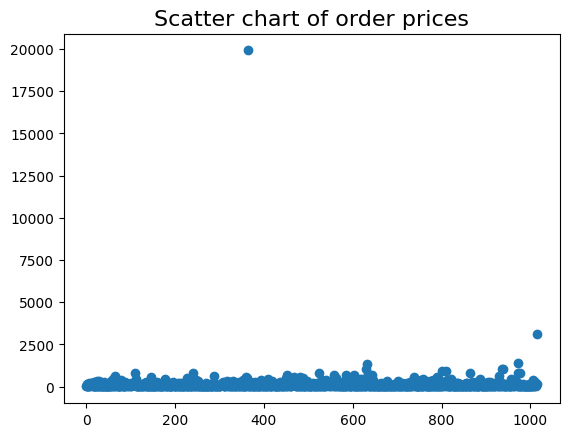

In [25]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.scatter(x_values, orders['revenue'])
plt.title('Scatter chart of order prices', fontsize=16)

The chart shows two abnormal orders.

In [26]:
np.percentile(orders['revenue'], [95, 99])

array([414.275, 830.3  ])

5% of orders have a sum greater than 414.275. Let's choose this number as an anomaly.

## Statistical significance of the difference in conversion between groups using raw data.

Null hypothesis - There is no significant difference in conversion between groups A and B (conversions are the same).

Alternative hypothesis - There is a significant difference in conversion between groups A and B (conversions are different).

In [27]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("P-value: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Difference in conversion rate: {0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

P-value: 0.011
Difference in conversion rate: 0.160


The P value is less than 0.05, so we reject the null hypothesis, statistically significant difference is present. Conversion of group B is better by 16%.

## Statistical significance of the difference in average order size between groups using raw data.

Null Hypothesis - There is no significant difference in the average order size between Groups A and B (means are the same).

Alternative Hypothesis - There is a significant difference in the average order size between Groups A and B (means are different).

In [28]:
print('P-value: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Relative difference in average order size: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value: 0.862
Relative difference in average order size: 0.278


The P value is greater than 0.05, so we cannot reject the null hypothesis. Although the difference in average order size between groups is 28%.

## Find the total number of abnormal users

In [29]:
orders_95th_percentile = ordersByUsersA['orders'].quantile(0.95)
revenue_95th_percentile = orders['revenue'].quantile(0.95)

usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > orders_95th_percentile]['userId'],
                                 ordersByUsersB[ordersByUsersB['orders'] > orders_95th_percentile]['userId']], axis=0)

usersWithExpensiveOrders = orders[orders['revenue'] > revenue_95th_percentile]['visitorId']

abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values()

print(abnormalUsers.head(5))
print(abnormalUsers.shape)

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
dtype: int64
(86,)


## Statistical significance of the difference in conversion between groups using filtered data.

Null hypothesis - There is no significant difference in conversion between groups A and B (conversions are the same).

Alternative hypothesis - There is a significant difference in conversion between groups A and B (conversions are different).

In [30]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

print("P-value: {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Difference in conversion rate: {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value: 0.016
Difference in conversion rate: 0.174


The P value has increased slightly, but is still less than 0.05. There is a statistically significant difference. Group B is 17% better.

## Statistical significance of the difference in average order size between groups using filtered data.

Null Hypothesis - There is no significant difference in the average order size between Groups A and B (means are the same).

Alternative Hypothesis - There is a significant difference in the average order size between Groups A and B (means are different).

In [31]:
print('P-value: {0:.3f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print('Relative difference in average order size: {0:.3f}'.format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

P-value: 0.771
Relative difference in average order size: -0.033


The P value has decreased but is still greater than 0.05, so we cannot reject the null hypothesis. There is no statistically significant difference. But in the unfiltered data, Group B was ahead by 28% and is now behind by 3%. Anomalies in orders affect the test results.

## Conclusion

Data analysis (both raw and filtered) showed statistically significant differences in conversion between Groups A and B, with Group B performing better with a difference of 16% (for raw data) and 17% (after filtering out abnormal users).

Regarding average order size, there was no statistically significant difference between the groups in either raw or filtered data, despite some differences in values.

Recommendations:
Given that the main improvement was found in conversion, it is recommended to stop additional testing at this stage. Instead, focus on optimizing the factors that influence conversion, with an emphasis on improvements in Group B. Separate experiments can be conducted to increase the average order size if this is critical for the business.